In [6]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def crossMat(kx, ky, kz):
    return np.matrix([[0, -kz, ky], [kz, 0, -kx], [-ky, kx, 0]])

def rotMat(l, m, n, s):
    K = crossMat(l, m, n)
    M = len(s)
    N = len(s[0])
    R0 = np.zeros((M, N, 9))
    I = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    for i in range(M):
        for j in range(N):
            tmps = s[i][j]
            tmpR = I + np.sin(tmps) * K + (1 - np.cos(tmps)) * np.dot(K, K)
            R0[i][j] = tmpR.reshape(1, 9)
    return R0

In [8]:
def surface(r, t, s, l, m, n):
    M = len(s)
    N = len(s[0])

    x = 4 + r * np.cos(t)
    y = r * np.sin(t)
    z = np.zeros((M, N))

    R = rotMat(l, m, n, s)
    for i in range(M):
        for j in range(N):
            rotM = R[i][j].reshape((3, 3))
            v = np.dot(rotM, np.array([[x[i][j], y[i][j], z[i][j]]]).T)
            x[i][j] = v[0].item(0)
            y[i][j] = v[1].item(0)
            z[i][j] = v[2].item(0)
    return x, y, z

In [9]:
num = 5
T = np.linspace(0, 2 * np.pi, 60)
# S = np.linspace(0, 2 * np.pi, num)
S = np.linspace(0, 2 * np.pi, 60)
T, S = np.meshgrid(T, S)

r = 1
k = np.array([1, 1, 0]) # 旋转轴方向
k = k / np.sqrt(np.dot(k, k))
u, v, w = surface(r, T, S, k[0], k[1], k[2])

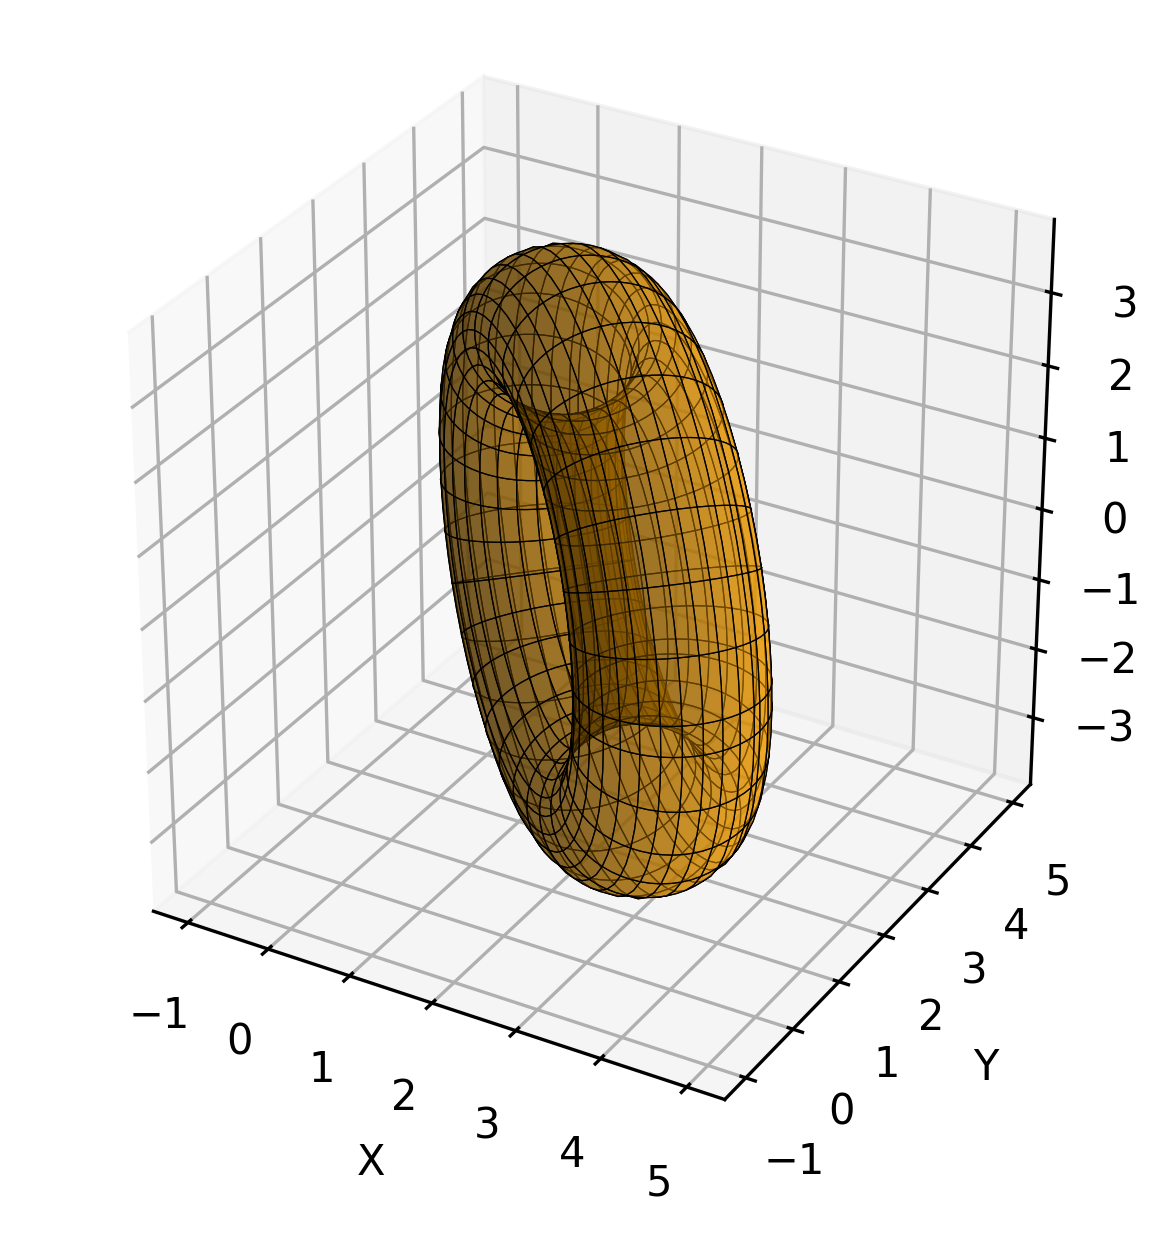

In [10]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1, 1, 1))
ax.plot_surface(u, v, w, color='orange', edgecolor='k', alpha=0.6, linewidth=0.3)
# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.set_title('3D Parametric Surface: Sphere')
# Show the plot
plt.show()